In [2]:
!pip install visualkeras

  Using cached visualkeras-0.1.4-py3-none-any.whl.metadata (11 kB)
Using cached visualkeras-0.1.4-py3-none-any.whl (17 kB)
   ---------------------------------------- 0.0/44.9 kB ? eta -:--:--
   ------------------ --------------------- 20.5/44.9 kB 330.3 kB/s eta 0:00:01
   ------------------------------------ --- 41.0/44.9 kB 487.6 kB/s eta 0:00:01
   ---------------------------------------- 44.9/44.9 kB 444.2 kB/s eta 0:00:00


In [1]:
from keras import models,layers
import visualkeras
from facenet import FaceNet

In [3]:
model = FaceNet()

In [ ]:
import tensorflow as tf

def FaceNet(embedding_size=128):
    inputs = tf.keras.Input(shape=(160, 160, 3))  # FaceNet takes 160x160 RGB images

    x = layers.Conv2D(64, (3, 3), padding='valid', activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Flatten()(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dense(embedding_size, activation=None)(x)

    outputs = layers.Lambda(lambda x: tf.math.l2_normalize(x, axis=-1), name='l2_normalize')(x)

    model = models.Model(inputs, outputs, name='FaceNet')
    return model

# Modeli oluştur ve özetini yazdır
facenet = FaceNet()
facenet.summary()


Model: "FaceNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 158, 158, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 158, 158, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 79, 79, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 79, 79, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 79, 79, 128)      512 

c:\Users\busra\anaconda3\envs\tf\lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


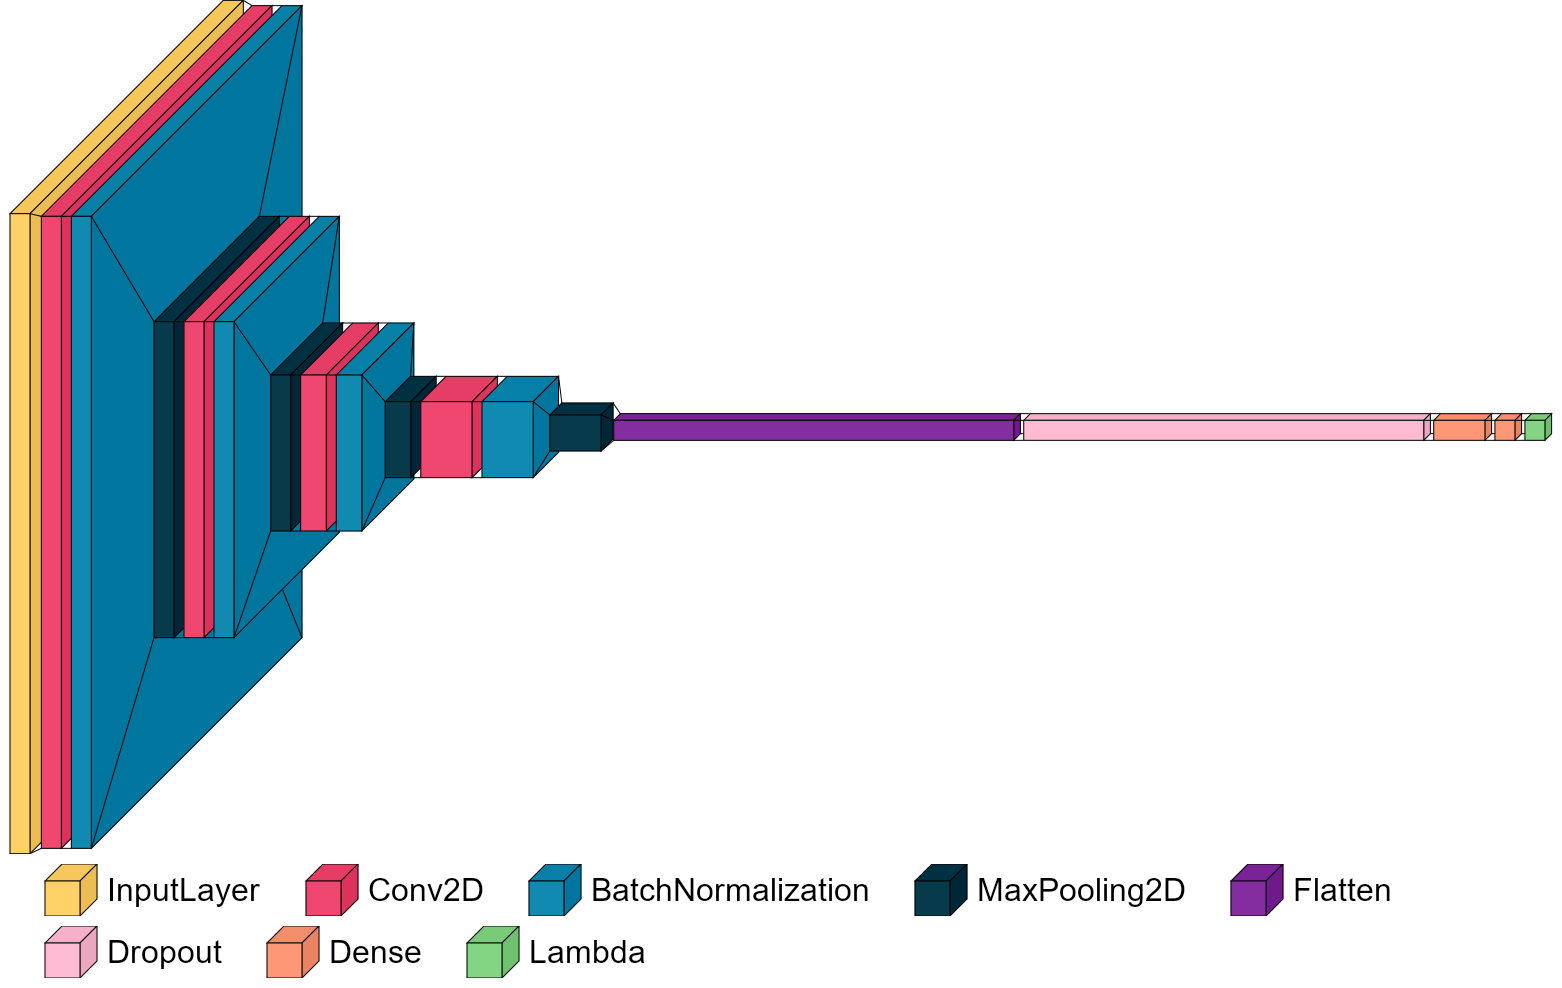

In [4]:
from PIL import ImageFont
import visualkeras
font = ImageFont.truetype("arial.ttf", 32)  # using comic sans is strictly prohibited!
visualkeras.layered_view(facenet, legend=True, font=font)  # font is optional!

c:\Users\busra\anaconda3\envs\3_10_12\lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


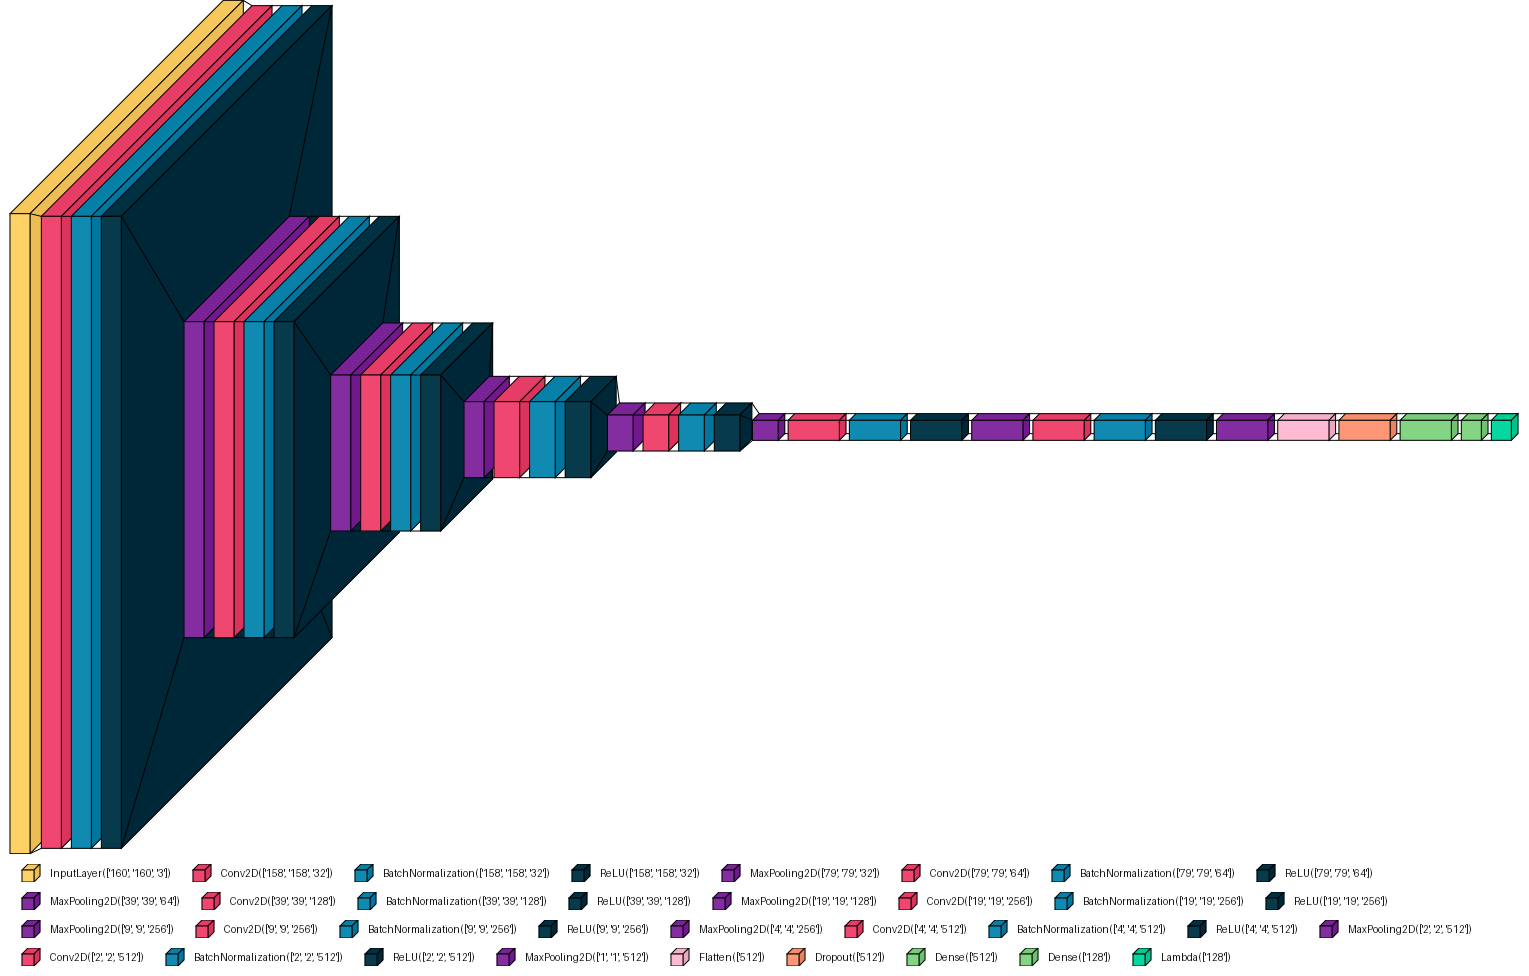

In [23]:
visualkeras.layered_view(facenet, legend=True, show_dimension=True)

c:\Users\busra\anaconda3\envs\3_10_12\lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


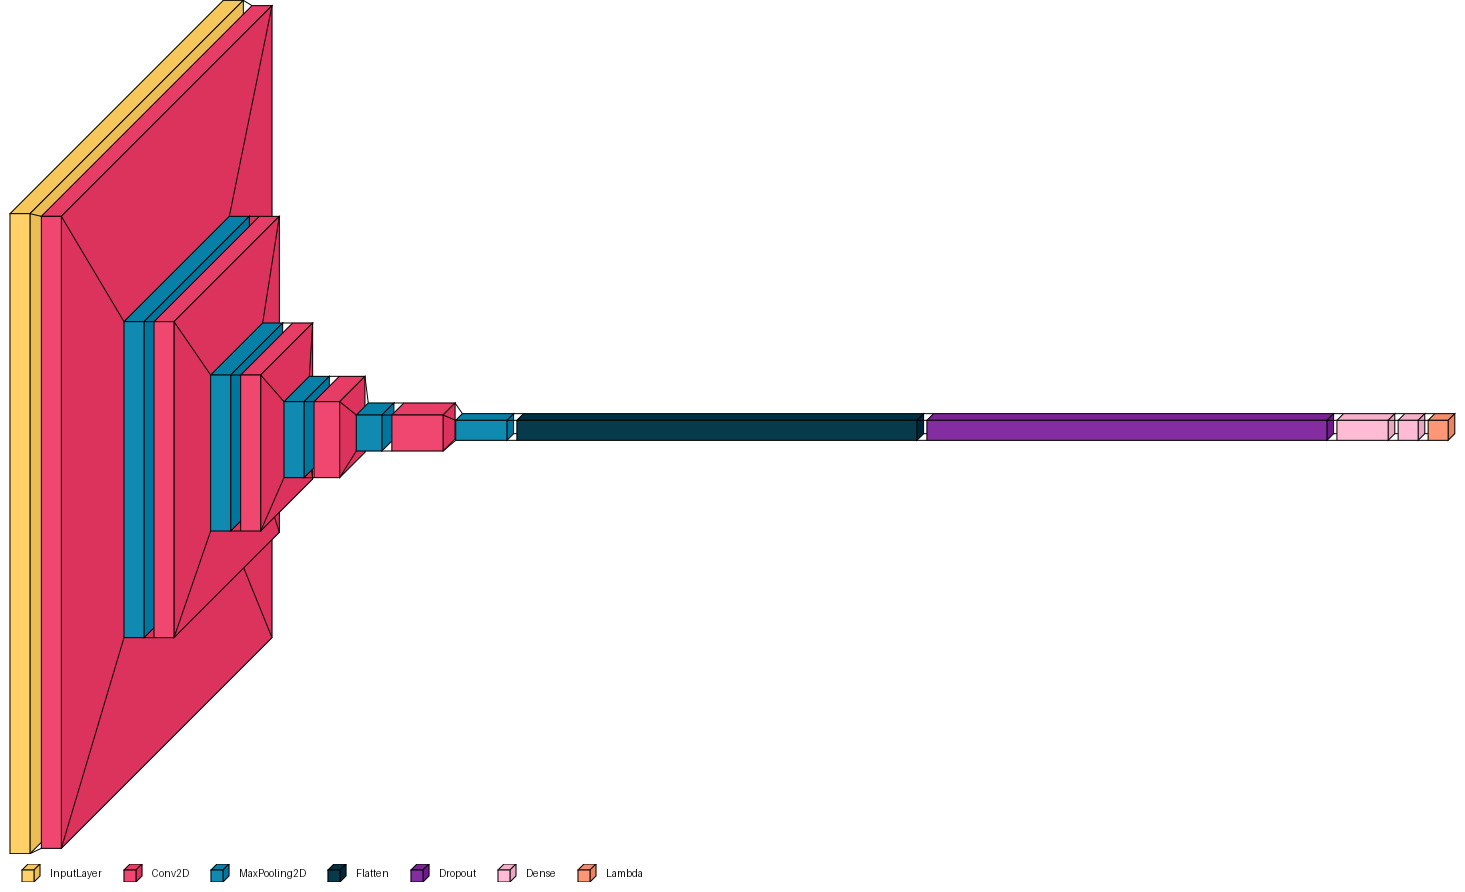

In [4]:
visualkeras.layered_view(model, type_ignore=[layers.ReLU, layers.BatchNormalization], legend=True)